Upload GANDHI portrait (TARGET):


Saving gandhi.jpg to gandhi (6).jpg
Upload YOUR photo (SOURCE):


Saving red and blue.jpg to red and blue.jpg


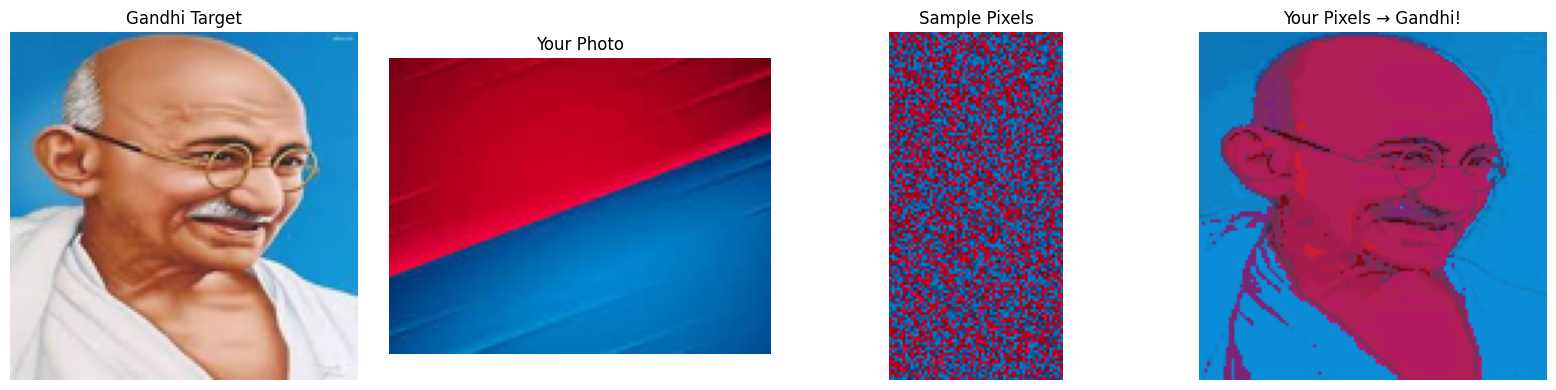

In [13]:
!pip install -q pillow numpy matplotlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def pixels_to_gandhi_fast():
    print("Upload GANDHI portrait (TARGET):")
    target_file = list(files.upload().keys())[0]
    target = Image.open(target_file).convert('RGB').resize((128, 128))  # Faster 128x128
    target_arr = np.array(target)

    print("Upload YOUR photo (SOURCE):")
    source_file = list(files.upload().keys())[0]
    source_flat = np.array(Image.open(source_file).convert('RGB')).reshape(-1, 3)

    # Sample pixels to exact target size
    n_pixels = target_arr.shape[0] * target_arr.shape[1]
    source_sample = source_flat[np.random.choice(len(source_flat), n_pixels, replace=True)]

    # Build mosaic
    mosaic = np.zeros_like(target_arr, dtype=np.uint8)
    for i in range(target_arr.shape[0]):
        for j in range(target_arr.shape[1]):
            target_color = target_arr[i, j].astype(np.float32)
            distances = np.sum((source_sample - target_color)**2, axis=1)
            best_idx = np.argmin(distances)
            mosaic[i, j] = source_sample[best_idx]

    plt.figure(figsize=(16,4))
    plt.subplot(1,4,1); plt.imshow(target); plt.title('Gandhi Target'); plt.axis('off')
    plt.subplot(1,4,2); plt.imshow(Image.open(source_file)); plt.title('Your Photo'); plt.axis('off')
    plt.subplot(1,4,3); plt.imshow(Image.fromarray(source_sample[:128*64].reshape(128,64,3))); plt.title('Sample Pixels'); plt.axis('off')
    plt.subplot(1,4,4); plt.imshow(Image.fromarray(mosaic)); plt.title('Your Pixels → Gandhi!'); plt.axis('off')
    plt.tight_layout(); plt.show()

pixels_to_gandhi_fast()
